In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

# Criação de uma tabela de municípios que possuem usinas em seus territórios

#### Leitura e tratamento de um conjunto de dados contendo nomes de localidades (IBGE)

In [46]:
# Fonte: IBGE (https://www.ibge.gov.br/geociencias/organizacao-do-territorio/estrutura-territorial/27385-localidades.html)
df_localidades = pd.read_csv(r"..\Dados brutos\IBGE\localidades IBGE 2010.csv", encoding = "utf-8")
df_localidades.head()

,ID,CD_GEOCODIGO,TIPO,CD_GEOCODBA,NM_BAIRRO,CD_GEOCODSD,NM_SUBDISTRITO,CD_GEOCODDS,NM_DISTRITO,CD_GEOCODMU,...,NM_MESO,NM_UF,CD_NIVEL,CD_CATEGORIA,NM_CATEGORIA,NM_LOCALIDADE,LONG,LAT,ALT,GM_PONTO_sk
0,1,110001505000001,URBANO,1.100015e+11,Redondo,11000150500,NaN,110001505,ALTA FLORESTA D'OESTE,1100015,...,LESTE RONDONIENSE,RONDÔNIA,1,5,CIDADE,ALTA FLORESTA D'OESTE,-61.999824,-11.935540,337.735719,1J6+^YP=gnhf
1,2,110001515000001,URBANO,NaN,NaN,11000151500,NaN,110001515,FILADÉLFIA D'OESTE,1100015,...,LESTE RONDONIENSE,RONDÔNIA,2,15,VILA,FILADÉLFIA D'OESTE,-62.043898,-12.437239,215.244429,1J6+gStX@d?>
2,3,110001520000001,URBANO,NaN,NaN,11000152000,NaN,110001520,IZIDOLÂNDIA,1100015,...,LESTE RONDONIENSE,RONDÔNIA,2,20,VILA,IZIDOLÂNDIA,-62.175549,-12.601415,181.044807,1J6+gwlc:Gtp
3,4,110001525000001,URBANO,NaN,NaN,11000152500,NaN,110001525,NOVA GEASE D'OESTE,1100015,...,LESTE RONDONIENSE,RONDÔNIA,2,25,VILA,NOVA GEASE D'OESTE,-62.318650,-11.919792,191.576571,1J6+^nhO?byf
4,5,110001530000001,URBANO,NaN,NaN,11000153000,NaN,110001530,ROLIM DE MOURA DO GUAPORÉ,1100015,...,LESTE RONDONIENSE,RONDÔNIA,2,30,VILA,ROLIM DE MOURA DO GUAPORÉ,-62.276812,-13.079806,157.285277,1J6+Hn4dy6Y-


In [47]:
df_localidades.describe()

,ID,CD_GEOCODIGO,CD_GEOCODBA,CD_GEOCODSD,CD_GEOCODDS,CD_GEOCODMU,CD_NIVEL,CD_CATEGORIA,LONG,LAT,ALT
count,21886.000000,2.188600e+04,8.810000e+02,2.188600e+04,2.188600e+04,2.188600e+04,21886.000000,21886.00000,21886.000000,21886.000000,21885.000000
mean,10943.500000,3.005958e+14,3.440989e+11,3.005958e+10,3.005958e+08,3.005958e+06,2.712876,8.81559,-45.544801,-14.067145,372.356992
std,6318.088332,9.586057e+13,9.743621e+10,9.586057e+09,9.586057e+07,9.586057e+05,1.489430,9.42972,6.977851,8.482817,290.851925
min,1.000000,1.100015e+14,1.100015e+11,1.100015e+10,1.100015e+08,1.100015e+06,1.000000,1.00000,-73.497613,-33.737540,0.000000
25%,5472.250000,2.307635e+14,2.606309e+11,2.307635e+10,2.307635e+08,2.307635e+06,1.000000,3.00000,-49.894042,-21.587551,111.089612
50%,10943.500000,2.921500e+14,3.533403e+11,2.921500e+10,2.921500e+08,2.921500e+06,3.000000,5.00000,-44.621916,-12.619125,329.329073
75%,16414.750000,3.528502e+14,4.215604e+11,3.528502e+10,3.528502e+08,3.528502e+06,3.000000,10.00000,-40.145956,-6.602599,582.394445
max,21886.000000,5.300108e+14,5.218300e+11,5.300108e+10,5.300108e+08,5.300108e+06,6.000000,125.00000,-32.435186,5.220071,1639.154504


In [48]:
unidades_federativas = {
    "GOIÁS":"GO",
    "ACRE":"AC",
    "ALAGOAS":"AL",
    "AMAPÁ":"AP",
    "AMAZONAS":"AM",
    "BAHIA":"BA",
    "CEARÁ":"CE",
    "DISTRITO FEDERAL":"DF",
    "ESPÍRITO SANTO":"ES",
    "GOIÁS":"GO",
    "MARANHÃO":"MA",
    "MATO GROSSO":"MT",
    "MATO GROSSO DO SUL":"MS",
    "MINAS GERAIS":"MG",
    "PARÁ":"PA",
    "PARAÍBA":"PB",
    "PARANÁ":"PR",
    "PERNAMBUCO":"PE",
    "PIAUÍ":"PI",
    "RIO DE JANEIRO":"RJ",
    "RIO GRANDE DO NORTE":"RN",
    "RIO GRANDE DO SUL":"RS",
    "RONDÔNIA":"RO",
    "RORAIMA":"RR",
    "SANTA CATARINA":"SC",
    "SÃO PAULO":"SP",
    "SERGIPE":"SE",
    "TOCANTINS":"TO",
}

In [49]:
df_localidades["SIGLA_UF"] = ""
for indice, linha in df_localidades.iterrows():
    uf = df_localidades.at[indice, "NM_UF"]
    df_localidades.at[indice, "SIGLA_UF"] = unidades_federativas[uf]
    
df_localidades.head()

,ID,CD_GEOCODIGO,TIPO,CD_GEOCODBA,NM_BAIRRO,CD_GEOCODSD,NM_SUBDISTRITO,CD_GEOCODDS,NM_DISTRITO,CD_GEOCODMU,...,NM_UF,CD_NIVEL,CD_CATEGORIA,NM_CATEGORIA,NM_LOCALIDADE,LONG,LAT,ALT,GM_PONTO_sk,SIGLA_UF
0,1,110001505000001,URBANO,1.100015e+11,Redondo,11000150500,NaN,110001505,ALTA FLORESTA D'OESTE,1100015,...,RONDÔNIA,1,5,CIDADE,ALTA FLORESTA D'OESTE,-61.999824,-11.935540,337.735719,1J6+^YP=gnhf,RO
1,2,110001515000001,URBANO,NaN,NaN,11000151500,NaN,110001515,FILADÉLFIA D'OESTE,1100015,...,RONDÔNIA,2,15,VILA,FILADÉLFIA D'OESTE,-62.043898,-12.437239,215.244429,1J6+gStX@d?>,RO
2,3,110001520000001,URBANO,NaN,NaN,11000152000,NaN,110001520,IZIDOLÂNDIA,1100015,...,RONDÔNIA,2,20,VILA,IZIDOLÂNDIA,-62.175549,-12.601415,181.044807,1J6+gwlc:Gtp,RO
3,4,110001525000001,URBANO,NaN,NaN,11000152500,NaN,110001525,NOVA GEASE D'OESTE,1100015,...,RONDÔNIA,2,25,VILA,NOVA GEASE D'OESTE,-62.318650,-11.919792,191.576571,1J6+^nhO?byf,RO
4,5,110001530000001,URBANO,NaN,NaN,11000153000,NaN,110001530,ROLIM DE MOURA DO GUAPORÉ,1100015,...,RONDÔNIA,2,30,VILA,ROLIM DE MOURA DO GUAPORÉ,-62.276812,-13.079806,157.285277,1J6+Hn4dy6Y-,RO


In [50]:
# Criando coluna "Localidade + UF"
df_localidades["LOCALIDADE_E_UF"] = df_localidades["NM_LOCALIDADE"] + " - " + df_localidades["SIGLA_UF"]
df_localidades.head()

,ID,CD_GEOCODIGO,TIPO,CD_GEOCODBA,NM_BAIRRO,CD_GEOCODSD,NM_SUBDISTRITO,CD_GEOCODDS,NM_DISTRITO,CD_GEOCODMU,...,CD_NIVEL,CD_CATEGORIA,NM_CATEGORIA,NM_LOCALIDADE,LONG,LAT,ALT,GM_PONTO_sk,SIGLA_UF,LOCALIDADE_E_UF
0,1,110001505000001,URBANO,1.100015e+11,Redondo,11000150500,NaN,110001505,ALTA FLORESTA D'OESTE,1100015,...,1,5,CIDADE,ALTA FLORESTA D'OESTE,-61.999824,-11.935540,337.735719,1J6+^YP=gnhf,RO,ALTA FLORESTA D'OESTE - RO
1,2,110001515000001,URBANO,NaN,NaN,11000151500,NaN,110001515,FILADÉLFIA D'OESTE,1100015,...,2,15,VILA,FILADÉLFIA D'OESTE,-62.043898,-12.437239,215.244429,1J6+gStX@d?>,RO,FILADÉLFIA D'OESTE - RO
2,3,110001520000001,URBANO,NaN,NaN,11000152000,NaN,110001520,IZIDOLÂNDIA,1100015,...,2,20,VILA,IZIDOLÂNDIA,-62.175549,-12.601415,181.044807,1J6+gwlc:Gtp,RO,IZIDOLÂNDIA - RO
3,4,110001525000001,URBANO,NaN,NaN,11000152500,NaN,110001525,NOVA GEASE D'OESTE,1100015,...,2,25,VILA,NOVA GEASE D'OESTE,-62.318650,-11.919792,191.576571,1J6+^nhO?byf,RO,NOVA GEASE D'OESTE - RO
4,5,110001530000001,URBANO,NaN,NaN,11000153000,NaN,110001530,ROLIM DE MOURA DO GUAPORÉ,1100015,...,2,30,VILA,ROLIM DE MOURA DO GUAPORÉ,-62.276812,-13.079806,157.285277,1J6+Hn4dy6Y-,RO,ROLIM DE MOURA DO GUAPORÉ - RO


#### Leitura e tratamento de um conjunto de dados contendo informações referentes a usinas elétricas (ANEEL)

In [51]:
# Lista de usinas elétricas
# Fonte: Aneel (https://dadosabertos.aneel.gov.br/dataset/siga-sistema-de-informacoes-de-geracao-da-aneel)
df_usinas = pd.read_csv(r"..\Dados brutos\ANEEL\siga-empreendimentos-geracao.csv", encoding = "utf-8")
df_usinas.head()

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
0,01/09/2023,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1400,0,Não,-20.124799,-43.870203,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
1,01/09/2023,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,3972,0,Não,-20.131873,-43.876935,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
2,01/09/2023,G,10,PCH.PH.MG.000010-8.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1440,0,Não,-20.137545,-43.891926,31/08/2000,31/08/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
3,01/09/2023,14 de Julho,12,UHE.PH.RS.000012-4.1,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,...,100000,45200,Não,-29.064753,-51.674942,15/03/2001,13/11/2039,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,Bento Gonçalves - RS. Cotiporã - RS
4,01/09/2023,Abaúna,15,CGH.PH.RS.000015-9.1,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,720,510,Não,-27.823775,-52.069997,NaN,NaN,100% para Cooperativa de Geração de Energia e ...,72 - Uruguai. Inhanduva. Peixe e outros,Floriano Peixoto - RS


In [52]:
# Colocando o nome dos municípios em caixa alta no conjunto de dados das usinas
df_usinas["DscMuninicpios"] = df_usinas["DscMuninicpios"].str.upper()
df_usinas.head()

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
0,01/09/2023,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1400,0,Não,-20.124799,-43.870203,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
1,01/09/2023,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,3972,0,Não,-20.131873,-43.876935,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
2,01/09/2023,G,10,PCH.PH.MG.000010-8.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1440,0,Não,-20.137545,-43.891926,31/08/2000,31/08/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
3,01/09/2023,14 de Julho,12,UHE.PH.RS.000012-4.1,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,...,100000,45200,Não,-29.064753,-51.674942,15/03/2001,13/11/2039,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,BENTO GONÇALVES - RS. COTIPORÃ - RS
4,01/09/2023,Abaúna,15,CGH.PH.RS.000015-9.1,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,720,510,Não,-27.823775,-52.069997,NaN,NaN,100% para Cooperativa de Geração de Energia e ...,72 - Uruguai. Inhanduva. Peixe e outros,FLORIANO PEIXOTO - RS


Nota: Há usinas localizadas em mais de um município. Utilizarei o primeiro município para fins de validação das coordenadas

In [53]:
for indice, linha in df_usinas.iterrows():
    municipios = linha["DscMuninicpios"].split(". ")
    municipio_estado = municipios[0] # selecionando apenas o primeiro município
    df_usinas.at[indice, "DscMuninicpios"] = municipio_estado # formato: Nome - Sigla da unidade federativa

df_usinas.head()

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
0,01/09/2023,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1400,0,Não,-20.124799,-43.870203,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
1,01/09/2023,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,3972,0,Não,-20.131873,-43.876935,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
2,01/09/2023,G,10,PCH.PH.MG.000010-8.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1440,0,Não,-20.137545,-43.891926,31/08/2000,31/08/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
3,01/09/2023,14 de Julho,12,UHE.PH.RS.000012-4.1,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,...,100000,45200,Não,-29.064753,-51.674942,15/03/2001,13/11/2039,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,BENTO GONÇALVES - RS
4,01/09/2023,Abaúna,15,CGH.PH.RS.000015-9.1,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,720,510,Não,-27.823775,-52.069997,NaN,NaN,100% para Cooperativa de Geração de Energia e ...,72 - Uruguai. Inhanduva. Peixe e outros,FLORIANO PEIXOTO - RS


#### Criação e tratamento do conjunto de dados contendo os nomes dos municípios em que cada usina elétrica está localizada

In [54]:
lista_de_municipios_com_usinas = list(df_usinas["DscMuninicpios"].unique())
lista_de_municipios_com_usinas.sort()
print(lista_de_municipios_com_usinas)

['ABADIA DOS DOURADOS - MG', 'ABAIARA - CE', 'ABDON BATISTA - SC', 'ABELARDO LUZ - SC', 'ABRE CAMPO - MG', 'ABREU E LIMA - PE', 'ACARAÚ - CE', 'ACARÁ - PA', 'ACAUÃ - PI', 'ACREÚNA - GO', 'ADAMANTINA - SP', 'ADUSTINA - BA', 'AFONSO BEZERRA - RN', 'AFRÂNIO - PE', 'AFUÁ - PA', 'AGRESTINA - PE', 'AGROLÂNDIA - SC', 'AGUDO - RS', 'AGUDOS - SP', 'AGUIARNÓPOLIS - TO', 'AJURICABA - RS', 'ALAGOA - MG', 'ALAGOINHAS - BA', 'ALDEIAS ALTAS - MA', 'ALEGRE - ES', 'ALEGRETE - RS', 'ALEGRETE DO PIAUÍ - PI', 'ALFENAS - MG', 'ALFREDO CHAVES - ES', 'ALMEIRIM - PA', 'ALMIRANTE TAMANDARÉ - PR', 'ALMIRANTE TAMANDARÉ DO SUL - RS', 'ALPERCATA - MG', 'ALTA FLORESTA - MT', 'ALTA FLORESTA D´OESTE - RO', 'ALTAMIRA - PA', 'ALTO ALEGRE - RR', 'ALTO ARAGUAIA - MT', 'ALTO DO RODRIGUES - RN', 'ALTO GARÇAS - MT', 'ALTO PARAGUAI - MT', 'ALTO PARANÁ - PR', 'ALTO TAQUARI - MT', 'ALVARENGA - MG', 'ALVARÃES - AM', 'ALVINÓPOLIS - MG', 'ALÉM PARAÍBA - MG', 'AMAJARI - RR', 'AMAMBAÍ - MS', 'AMATURÁ - AM', 'AMERICANA - SP', 'AMETI

In [55]:
# Removendo o município "NÃO INFORMADO" do escopo de busca
lista_de_municipios_com_usinas.remove("NÃO INFORMADO")

In [56]:
df_municipios_com_usinas = pd.DataFrame()
df_municipios_com_usinas["MUNICÍPIO - UF"] = lista_de_municipios_com_usinas
for indice, linha in df_municipios_com_usinas.iterrows():
    uf = df_municipios_com_usinas.at[indice, "MUNICÍPIO - UF"].split(" - ")
    if(len(uf)<2):
        df_municipios_com_usinas.at[indice, "UF"] = ""
        print(indice)
    else:
        df_municipios_com_usinas.at[indice, "UF"] = uf[1]
        
df_municipios_com_usinas.head()


,MUNICÍPIO - UF,UF
0,ABADIA DOS DOURADOS - MG,MG
1,ABAIARA - CE,CE
2,ABDON BATISTA - SC,SC
3,ABELARDO LUZ - SC,SC
4,ABRE CAMPO - MG,MG


In [57]:
# Adicionando coordenadas dos municípios ao conjunto de dados dos municípios que abrigam usinas
df_municipios_com_usinas["LATITUDE"] = np.nan
df_municipios_com_usinas["LONGITUDE"] = np.nan
for indice, linha in df_municipios_com_usinas.iterrows():
    municipio_estado = df_municipios_com_usinas.at[indice, "MUNICÍPIO - UF"]
    linha_municipio = df_localidades[df_localidades["LOCALIDADE_E_UF"] == municipio_estado]
    if len(linha_municipio) != 0:
        latitude = linha_municipio["LAT"].iloc[0]
        longitude = linha_municipio["LONG"].iloc[0]
        df_municipios_com_usinas.at[indice, "LATITUDE"] = latitude
        df_municipios_com_usinas.at[indice, "LONGITUDE"] = longitude
        
df_municipios_com_usinas.head()

,MUNICÍPIO - UF,UF,LATITUDE,LONGITUDE
0,ABADIA DOS DOURADOS - MG,MG,-18.487565,-47.396832
1,ABAIARA - CE,CE,-7.356977,-39.047547
2,ABDON BATISTA - SC,SC,-27.608987,-51.025272
3,ABELARDO LUZ - SC,SC,-26.563031,-52.336482
4,ABRE CAMPO - MG,MG,-20.301445,-42.480990


In [58]:
df_municipios_com_usinas.info() # Há municípios no conjunto de usinas que não foram encontrados no conjunto de localidades

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860 entries, 0 to 1859
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MUNICÍPIO - UF  1860 non-null   object 
 1   UF              1860 non-null   object 
 2   LATITUDE        1839 non-null   float64
 3   LONGITUDE       1839 non-null   float64
dtypes: float64(2), object(2)
memory usage: 58.2+ KB


In [59]:
# Exame dos municípios não encontrados
filtro_nulo = df_municipios_com_usinas[(df_municipios_com_usinas["LATITUDE"]).isna() | (df_municipios_com_usinas["LONGITUDE"]).isna()]
filtro_nulo

,MUNICÍPIO - UF,UF,LATITUDE,LONGITUDE
34,ALTA FLORESTA D´OESTE - RO,RO,NaN,NaN
48,AMAMBAÍ - MS,MS,NaN,NaN
126,ARMAÇÃO DE BÚZIOS - RJ,RJ,NaN,NaN
183,BATAIPORÃ - MS,MS,NaN,NaN
442,CHIAPETA - RS,RS,NaN,NaN
592,ESPIGÃO D´OESTE - RO,RO,NaN,NaN
772,IPAUÇU - SP,SP,NaN,NaN
810,ITAPEJARA D´OESTE - PR,PR,NaN,NaN
926,LAGOA DO ITAENGA - PE,PE,NaN,NaN
929,LAGOAS - MG,MG,NaN,NaN


In [60]:
df = pd.DataFrame(filtro_nulo)

# Fuzzy matching - adaptado de https://www.statology.org/fuzzy-matching-pandas/
import difflib
df["NOME APROXIMADO"] = df["MUNICÍPIO - UF"]
df["MUNICÍPIO - UF"] = df["MUNICÍPIO - UF"].apply(lambda x: difflib.get_close_matches(x, df_localidades["LOCALIDADE_E_UF"])[0])

df

,MUNICÍPIO - UF,UF,LATITUDE,LONGITUDE,NOME APROXIMADO
34,ALTA FLORESTA D'OESTE - RO,RO,NaN,NaN,ALTA FLORESTA D´OESTE - RO
48,AMAMBAI - MS,MS,NaN,NaN,AMAMBAÍ - MS
126,ARMAÇÃO DOS BÚZIOS - RJ,RJ,NaN,NaN,ARMAÇÃO DE BÚZIOS - RJ
183,BATAYPORÃ - MS,MS,NaN,NaN,BATAIPORÃ - MS
442,CHIAPETTA - RS,RS,NaN,NaN,CHIAPETA - RS
592,ESPIGÃO D'OESTE - RO,RO,NaN,NaN,ESPIGÃO D´OESTE - RO
772,IPAUSSU - SP,SP,NaN,NaN,IPAUÇU - SP
810,ITAPEJARA D'OESTE - PR,PR,NaN,NaN,ITAPEJARA D´OESTE - PR
926,LAGOA DE ITAENGA - PE,PE,NaN,NaN,LAGOA DO ITAENGA - PE
929,ALAGOAS - MG,MG,NaN,NaN,LAGOAS - MG


In [61]:
# Validação manual de dados: entrada 929 refere-se ao município de Sete Lagoas
df.at[929,"MUNICÍPIO - UF"] = "SETE LAGOAS - MG"
df

,MUNICÍPIO - UF,UF,LATITUDE,LONGITUDE,NOME APROXIMADO
34,ALTA FLORESTA D'OESTE - RO,RO,NaN,NaN,ALTA FLORESTA D´OESTE - RO
48,AMAMBAI - MS,MS,NaN,NaN,AMAMBAÍ - MS
126,ARMAÇÃO DOS BÚZIOS - RJ,RJ,NaN,NaN,ARMAÇÃO DE BÚZIOS - RJ
183,BATAYPORÃ - MS,MS,NaN,NaN,BATAIPORÃ - MS
442,CHIAPETTA - RS,RS,NaN,NaN,CHIAPETA - RS
592,ESPIGÃO D'OESTE - RO,RO,NaN,NaN,ESPIGÃO D´OESTE - RO
772,IPAUSSU - SP,SP,NaN,NaN,IPAUÇU - SP
810,ITAPEJARA D'OESTE - PR,PR,NaN,NaN,ITAPEJARA D´OESTE - PR
926,LAGOA DE ITAENGA - PE,PE,NaN,NaN,LAGOA DO ITAENGA - PE
929,SETE LAGOAS - MG,MG,NaN,NaN,LAGOAS - MG


In [63]:
for indice, linha in df.iterrows():
    municipio_estado = df.at[indice, "MUNICÍPIO - UF"]
    linha_municipio = df_localidades[df_localidades["LOCALIDADE_E_UF"] == municipio_estado]
    if len(linha_municipio) != 0:
        latitude = linha_municipio["LAT"].iloc[0]
        longitude = linha_municipio["LONG"].iloc[0]
        df_municipios_com_usinas.at[indice, "MUNICÍPIO - UF"] = municipio_estado        
        df_municipios_com_usinas.at[indice, "LATITUDE"] = latitude
        df_municipios_com_usinas.at[indice, "LONGITUDE"] = longitude
        print(municipio_estado, latitude, longitude)
        
# Os dados com longitude e latitude vazios foram corrigidos
df_municipios_com_usinas.info()

ALTA FLORESTA D'OESTE - RO -11.9355403 -61.9998239
AMAMBAI - MS -23.10058224 -55.24382769
ARMAÇÃO DOS BÚZIOS - RJ -22.75776379 -41.88774947
BATAYPORÃ - MS -22.29587997 -53.27480699
CHIAPETTA - RS -27.91736475 -53.9457497
ESPIGÃO D'OESTE - RO -11.52855463 -61.02017311
IPAUSSU - SP -23.052913 -49.62680698
ITAPEJARA D'OESTE - PR -25.97087805 -52.8139296
LAGOA DE ITAENGA - PE -7.932378179 -35.29280365
SETE LAGOAS - MG -19.45828742 -44.23959462
MACHADINHO D'OESTE - RO -9.42556248 -61.99959257
MIRANDÓPOLIS - SP -21.13208699 -51.10564039
MOGI DAS CRUZES - SP -23.5227065 -46.19676008
MOJI MIRIM - SP -22.4326955 -46.95636713
NOVA BRASILÂNDIA D'OESTE - RO -11.72132541 -62.30823016
PARAÍSO DAS ÁGUAS - SP -20.17980038 -51.01836561
SANTA BÁRBARA D'OESTE - SP -22.7553935 -47.41395477
SANT'ANA DO LIVRAMENTO - RS -30.88938401 -55.53481427
SÃO LOURENÇO DO OESTE - SC -26.35519016 -52.85133367
SÍTIO D'ABADIA - GO -14.80399392 -46.25248984
TRAJANO DE MORAES - RJ -22.0613797 -42.05481525
<class 'pandas.cor

In [64]:
df_municipios_com_usinas.to_csv(r"..\Dados tratados\LISTA - MUNICÍPIOS COM USINAS.csv", encoding = "utf-8", index=False)

#### Visualização dos municípios que abrigam usinas elétricas em seus territórios

In [65]:
brasil_map = gpd.read_file(r"..\Dados brutos\IBGE\Shapefiles\BR_UF_2021\BR_UF_2021.shp")

<AxesSubplot:>

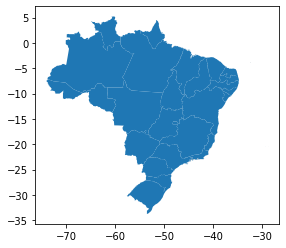

In [66]:
brasil_map.plot()

<AxesSubplot:>

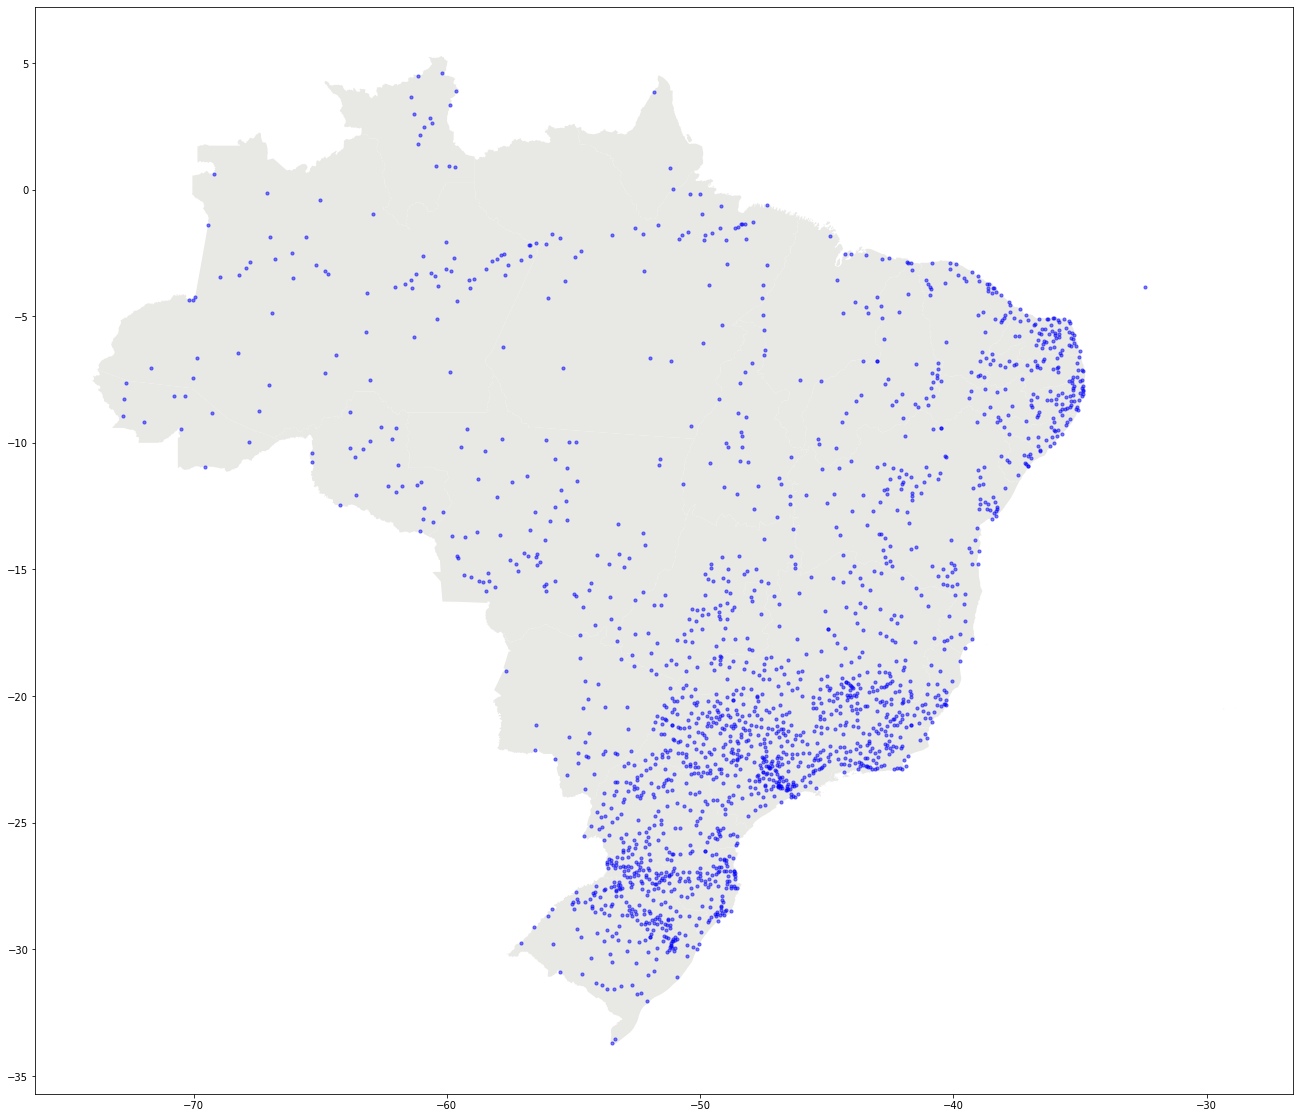

In [67]:
geometria_municipios_com_usinas = [Point(coords) for coords in zip(df_municipios_com_usinas['LONGITUDE'], df_municipios_com_usinas['LATITUDE'])]
geo_df_municipios_com_usinas = gpd.GeoDataFrame(df_municipios_com_usinas, geometry = geometria_municipios_com_usinas)

figura, eixo = plt.subplots()
figura.set_figheight(20)
figura.set_figwidth(40)
brasil_map.plot(ax = eixo, color="#e8e8e5")
geo_df_municipios_com_usinas.plot(ax = eixo, markersize = 10, color = "blue", alpha = 0.5)

In [68]:
# Ajustando a formatação dos nomes dos municípios
# para fins de consistência entre a tabela de municípios com usinas e a tabela de usinas
lista_de_municipios_com_usinas = list(df_municipios_com_usinas["MUNICÍPIO - UF"].unique())
filtro_municipios = ~df_usinas["DscMuninicpios"].isin(lista_de_municipios_com_usinas)
df_municipios_inconsistentes = pd.DataFrame(df_usinas[filtro_municipios])
df_municipios_inconsistentes

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
14,01/09/2023,Alta Floresta,58,CGH.PH.RO.000058-2.2,RO,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,5000,0,Não,0.000000,0.000000,NaN,NaN,100% para ELETRON ELETRICIDADE DE RONDÔNIA S/A...,15 - Madeira,ALTA FLORESTA D´OESTE - RO
122,01/09/2023,Chopim I,771,CGH.PH.PR.000771-4.2,PR,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,1980,1480,Não,-25.985576,-52.747351,NaN,NaN,100% para Copel Geração E Transmissão S.A. (REG),65 - Parana. Iguacu,ITAPEJARA D´OESTE - PR
254,01/09/2023,Macabu,1347,PCH.PH.RJ.001347-1.1,RJ,PCH,Operação,Hídrica,Potencial hidráulico,Concessão,...,21000,8510,Não,-22.139286,-42.098058,09/12/1996,26/07/2028,100% para Quanta Geração S.A. (PIE),59 - Litoraneas do Rio de Janeiro,TRAJANO DE MORAIS - RJ
257,01/09/2023,Machadinho I,1358,PCH.PH.RO.001358-7.1,RO,PCH,Construção não iniciada,Hídrica,Potencial hidráulico,Autorização,...,0,6360,Não,-9.446944,-61.987500,08/05/2002,08/05/2032,100% para PROPOWER GERADORA DE ENERGIA LTDA (PIE),15 - Madeira,MACHADINHO D´OESTE - RO
418,01/09/2023,Saldanha,2569,PCH.PH.RO.002569-0.1,RO,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,5280,0,Não,-11.985439,-62.179630,19/12/2002,19/12/2032,100% para HIDROLUZ CENTRAIS ELÉTRICAS LTDA (PIE),15 - Madeira,ALTA FLORESTA D´OESTE - RO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25584,01/09/2023,Kapa Zero,72139,UFV.RS.RO.072139-5.1,RO,UFV,Operação,Solar,Radiação solar,Registro,...,1000,0,Não,-11.511389,-62.164444,NaN,NaN,100% para Centrais Elétricas Cesar Filho Ltda ...,NaN,NOVA BRASILÂNDIA D´OESTE - RO
25661,01/09/2023,Canto Porto 01,72703,UFV.RS.SP.072703-2.1,SP,UFV,Operação,Solar,Radiação solar,Registro,...,360,0,Não,-22.469167,-46.916111,NaN,NaN,100% para CONDOMÍNIO RURAL CANTO PORTO (REG),NaN,MOJI-MIRIM - SP
25663,01/09/2023,Canto Porto 02 - Pivô,72775,UFV.RS.SP.072775-0.1,SP,UFV,Operação,Solar,Radiação solar,Registro,...,516,0,Não,-22.457222,-46.902500,NaN,NaN,100% para CONDOMÍNIO RURAL CANTO PORTO (REG),NaN,MOJI-MIRIM - SP
25713,01/09/2023,Canto Porto - Piscina,72965,UFV.RS.SP.072965-5.1,SP,UFV,Operação,Solar,Radiação solar,Registro,...,72,0,Não,0.000000,0.000000,NaN,NaN,100% para CONDOMÍNIO RURAL CANTO PORTO (REG),NaN,MOJI-MIRIM - SP


In [69]:
# Fuzzy matching - adaptado de https://www.statology.org/fuzzy-matching-pandas/
import difflib

for indice, linha in df_municipios_inconsistentes.iterrows():
    municipio_inconsistente = df_municipios_inconsistentes.at[indice, "DscMuninicpios"]
    municipio_consistente = difflib.get_close_matches(municipio_inconsistente, df_municipios_com_usinas["MUNICÍPIO - UF"], n=1)
    print(municipio_consistente)
    if municipio_consistente:
        df_municipios_inconsistentes.at[indice, "DscMuninicpios"] = municipio_consistente[0]

df_municipios_inconsistentes.tail(20)

["ALTA FLORESTA D'OESTE - RO"]
["ITAPEJARA D'OESTE - PR"]
['TRAJANO DE MORAES - RJ']
["MACHADINHO D'OESTE - RO"]
["ALTA FLORESTA D'OESTE - RO"]
["ALTA FLORESTA D'OESTE - RO"]
["ALTA FLORESTA D'OESTE - RO"]
["SANTA BÁRBARA D'OESTE - SP"]
["ITAPEJARA D'OESTE - PR"]
["ALTA FLORESTA D'OESTE - RO"]
['MIRANDÓPOLIS - SP']
['LAGOA DE ITAENGA - PE']
["ALTA FLORESTA D'OESTE - RO"]
["SÍTIO D'ABADIA - GO"]
["ALTA FLORESTA D'OESTE - RO"]
['CHIAPETTA - RS']
["ESPIGÃO D'OESTE - RO"]
['LAGOA DE ITAENGA - PE']
['MOGI DAS CRUZES - SP']
['AMAMBAI - MS']
["ALTA FLORESTA D'OESTE - RO"]
['IPAUSSU - SP']
["SANT'ANA DO LIVRAMENTO - RS"]
["SANT'ANA DO LIVRAMENTO - RS"]
["SANT'ANA DO LIVRAMENTO - RS"]
['BATAYPORÃ - MS']
["ALTA FLORESTA D'OESTE - RO"]
["SANT'ANA DO LIVRAMENTO - RS"]
["SANT'ANA DO LIVRAMENTO - RS"]
['ALAGOA - MG']
["SANT'ANA DO LIVRAMENTO - RS"]
["SANT'ANA DO LIVRAMENTO - RS"]
["SANT'ANA DO LIVRAMENTO - RS"]
['MOGI DAS CRUZES - SP']
['MOGI DAS CRUZES - SP']
['MOJI MIRIM - SP']
['MOGI DAS CRUZES -

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
9979,01/09/2023,Ngk I,46336,UFV.RS.SP.046336-1.1,SP,UFV,Operação,Solar,Radiação solar,Registro,...,60,0,Não,-23.558156,-46.142903,NaN,NaN,100% para CERÂMICA E VELAS DE IGNIÇÃO NGK DO B...,NaN,MOGI DAS CRUZES - SP
11935,01/09/2023,BBF Izidolândia,51444,UTE.BL.RO.051444-6.1,RO,UTE,Operação,Biomassa,Biocombustíveis líquidos,Autorização,...,640,0,Não,-12.608786,-62.176059,13/09/2021,13/09/2056,95% para Brasil Bio Fuels S.A. (PIE). 5% para ...,NaN,ALTA FLORESTA D'OESTE - RO
12943,01/09/2023,Fótons de Santa Marta 01,55203,UFV.RS.MS.055203-8.1,MS,UFV,Construção não iniciada,Solar,Radiação solar,Autorização,...,0,0,Não,-19.363444,-52.878139,30/08/2023,30/08/2058,100% para FÓTONS DE SANTA MARTA ENERGIAS RENOV...,NaN,PARAÍSO DAS ÁGUAS - SP
12944,01/09/2023,Fótons de Santa Marta 02,55204,UFV.RS.MS.055204-6.1,MS,UFV,Construção não iniciada,Solar,Radiação solar,Autorização,...,0,0,Não,-19.360972,-52.863389,30/08/2023,30/08/2058,100% para FÓTONS DE SANTA MARTA ENERGIAS RENOV...,NaN,PARAÍSO DAS ÁGUAS - SP
12945,01/09/2023,Fótons de Santa Marta 03,55205,UFV.RS.MS.055205-4.1,MS,UFV,Construção não iniciada,Solar,Radiação solar,Autorização,...,0,0,Não,-19.353583,-52.850944,30/08/2023,30/08/2058,100% para FÓTONS DE SANTA MARTA ENERGIAS RENOV...,NaN,PARAÍSO DAS ÁGUAS - SP
12946,01/09/2023,Fótons de Santa Marta 04,55206,UFV.RS.MS.055206-2.1,MS,UFV,Construção não iniciada,Solar,Radiação solar,Autorização,...,0,0,Não,-19.353583,-52.841000,30/08/2023,30/08/2058,100% para FÓTONS DE SANTA MARTA ENERGIAS RENOV...,NaN,PARAÍSO DAS ÁGUAS - SP
12947,01/09/2023,Fótons de Santa Marta 05,55207,UFV.RS.MS.055207-0.1,MS,UFV,Construção não iniciada,Solar,Radiação solar,Autorização,...,0,0,Não,-19.321528,-52.833694,30/08/2023,30/08/2058,100% para FÓTONS DE SANTA MARTA ENERGIAS RENOV...,NaN,PARAÍSO DAS ÁGUAS - SP
12948,01/09/2023,Fótons de Santa Marta 06,55208,UFV.RS.MS.055208-9.1,MS,UFV,Construção não iniciada,Solar,Radiação solar,Autorização,...,0,0,Não,-19.343722,-52.830611,30/08/2023,30/08/2058,100% para FÓTONS DE SANTA MARTA ENERGIAS RENOV...,NaN,PARAÍSO DAS ÁGUAS - SP
12949,01/09/2023,Fótons de Santa Marta 07,55209,UFV.RS.MS.055209-7.1,MS,UFV,Construção não iniciada,Solar,Radiação solar,Autorização,...,0,0,Não,-19.336333,-52.827194,30/08/2023,30/08/2058,100% para FÓTONS DE SANTA MARTA ENERGIAS RENOV...,NaN,PARAÍSO DAS ÁGUAS - SP
12950,01/09/2023,Fótons de Santa Marta 08,55210,UFV.RS.MS.055210-0.1,MS,UFV,Construção não iniciada,Solar,Radiação solar,Autorização,...,0,0,Não,-19.331389,-52.823417,30/08/2023,30/08/2058,100% para FÓTONS DE SANTA MARTA ENERGIAS RENOV...,NaN,PARAÍSO DAS ÁGUAS - SP


In [70]:
for indice, linha in df_municipios_inconsistentes.iterrows():
    df_usinas.at[indice, "DscMuninicpios"] = df_municipios_inconsistentes.at[indice, "DscMuninicpios"]
    
df_usinas.tail(20)

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
25722,01/09/2023,Terraboa,72974,UFV.RS.RS.072974-4.1,RS,UFV,Operação,Solar,Radiação solar,Registro,...,289,0,Não,0.0,0.0,NaN,NaN,100% para TERRABOA AGRÍCOLA LTDA (REG),NaN,CRUZ ALTA - RS
25723,01/09/2023,Usf Icapuí 1,72975,UFV.RS.CE.072975-2.1,CE,UFV,Operação,Solar,Radiação solar,Registro,...,100,0,Não,0.0,0.0,NaN,NaN,100% para B. A. DOMINGUEZ (REG),NaN,ICAPUÍ - CE
25724,01/09/2023,X3 Reciclagens,72976,UFV.RS.PB.072976-0.1,PB,UFV,Operação,Solar,Radiação solar,Registro,...,300,0,Não,0.0,0.0,NaN,NaN,100% para X3 RECICLAGEM FIAÇÃO TEXTIL LTDA (REG),NaN,CAJAZEIRAS - PB
25725,01/09/2023,Sidore,72977,UFV.RS.RN.072977-9.1,RN,UFV,Operação,Solar,Radiação solar,Registro,...,700,0,Não,0.0,0.0,NaN,NaN,100% para SIDORE INDÚSTRIA E COMÉRCIO DE REFRI...,NaN,PARNAMIRIM - RN
25726,01/09/2023,Sig,72978,UFV.RS.PR.072978-7.1,PR,UFV,Operação,Solar,Radiação solar,Registro,...,2330,0,Não,0.0,0.0,NaN,NaN,100% para BRASOL SISTEMAS DE ENERGIA SOLAR 4 L...,NaN,CAMPO LARGO - PR
25727,01/09/2023,Txai Agropecuária e Turismo Fv,72979,UFV.RS.BA.072979-5.1,BA,UFV,Operação,Solar,Radiação solar,Registro,...,86,0,Não,0.0,0.0,NaN,NaN,100% para TX AGROPECUÁRIA E TURISMO S.A. (REG),NaN,ITACARÉ - BA
25728,01/09/2023,Geração Zero Grid de 42.84 Kwp,73207,UFV.RS.SP.073207-9.1,SP,UFV,Operação,Solar,Radiação solar,Registro,...,42,0,Não,0.0,0.0,NaN,NaN,100% para CNH INDUSTRIAL BRASIL LTDA. (REG),NaN,PIRACICABA - SP
25729,01/09/2023,Univel,73208,UFV.RS.PR.073208-7.1,PR,UFV,Operação,Solar,Radiação solar,Registro,...,700,0,Não,0.0,0.0,NaN,NaN,100% para UNIÃO EDUCACIONAL DE CASCAVEL - UNIV...,NaN,CASCAVEL - PR
25730,01/09/2023,SETE CAMPOS 01,73213,UFV.RS.TO.073213-3.1,TO,UFV,Construção não iniciada,Solar,Radiação solar,Autorização,...,0,0,Não,0.0,0.0,30/08/2023,30/08/2058,100% para Agrícola Sete Campos LTDA. (PIE),NaN,DIANÓPOLIS - TO
25731,01/09/2023,SETE CAMPOS 02,73214,UFV.RS.TO.073214-1.1,TO,UFV,Construção não iniciada,Solar,Radiação solar,Autorização,...,0,0,Não,0.0,0.0,30/08/2023,30/08/2058,100% para Agrícola Sete Campos LTDA. (PIE),NaN,DIANÓPOLIS - TO


In [71]:
# Há duas entradas cujo nome do município consta como "NÃO INFORMADO"
'''print(df_usinas.shape[0])
print(df_usinas.at[24269,"DscMuninicpios"])
print(df_usinas.at[25505,"DscMuninicpios"])
df_usinas=df_usinas.drop(24269)
df_usinas=df_usinas.drop(25505)
print(df_usinas.shape[0])
'''

'print(df_usinas.shape[0])\nprint(df_usinas.at[24269,"DscMuninicpios"])\nprint(df_usinas.at[25505,"DscMuninicpios"])\ndf_usinas=df_usinas.drop(24269)\ndf_usinas=df_usinas.drop(25505)\nprint(df_usinas.shape[0])\n'

#### Filtragem, validação e tratamento do conjunto de dados referente às usinas elétricas

In [72]:
# SELEÇÃO DAS USINAS EM OPERAÇÃO
fases_de_operacao_das_usinas = list(df_usinas["DscFaseUsina"].unique())
print(fases_de_operacao_das_usinas)

['Operação', 'Construção não iniciada', 'Construção']


In [73]:
df_usinas = df_usinas[df_usinas["DscFaseUsina"]=="Operação"]
fases_de_operacao_das_usinas = list(df_usinas["DscFaseUsina"].unique())
print(fases_de_operacao_das_usinas)

['Operação']


In [74]:
df_usinas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21923 entries, 0 to 25741
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DatGeracaoConjuntoDados       21923 non-null  object 
 1   NomEmpreendimento             21923 non-null  object 
 2   IdeNucleoCEG                  21923 non-null  int64  
 3   CodCEG                        21923 non-null  object 
 4   SigUFPrincipal                21923 non-null  object 
 5   SigTipoGeracao                21923 non-null  object 
 6   DscFaseUsina                  21923 non-null  object 
 7   DscOrigemCombustivel          21923 non-null  object 
 8   DscFonteCombustivel           21923 non-null  object 
 9   DscTipoOutorga                21923 non-null  object 
 10  NomFonteCombustivel           21923 non-null  object 
 11  DatEntradaOperacao            21923 non-null  object 
 12  MdaPotenciaOutorgadaKw        21923 non-null  float64
 13  M

<AxesSubplot:>

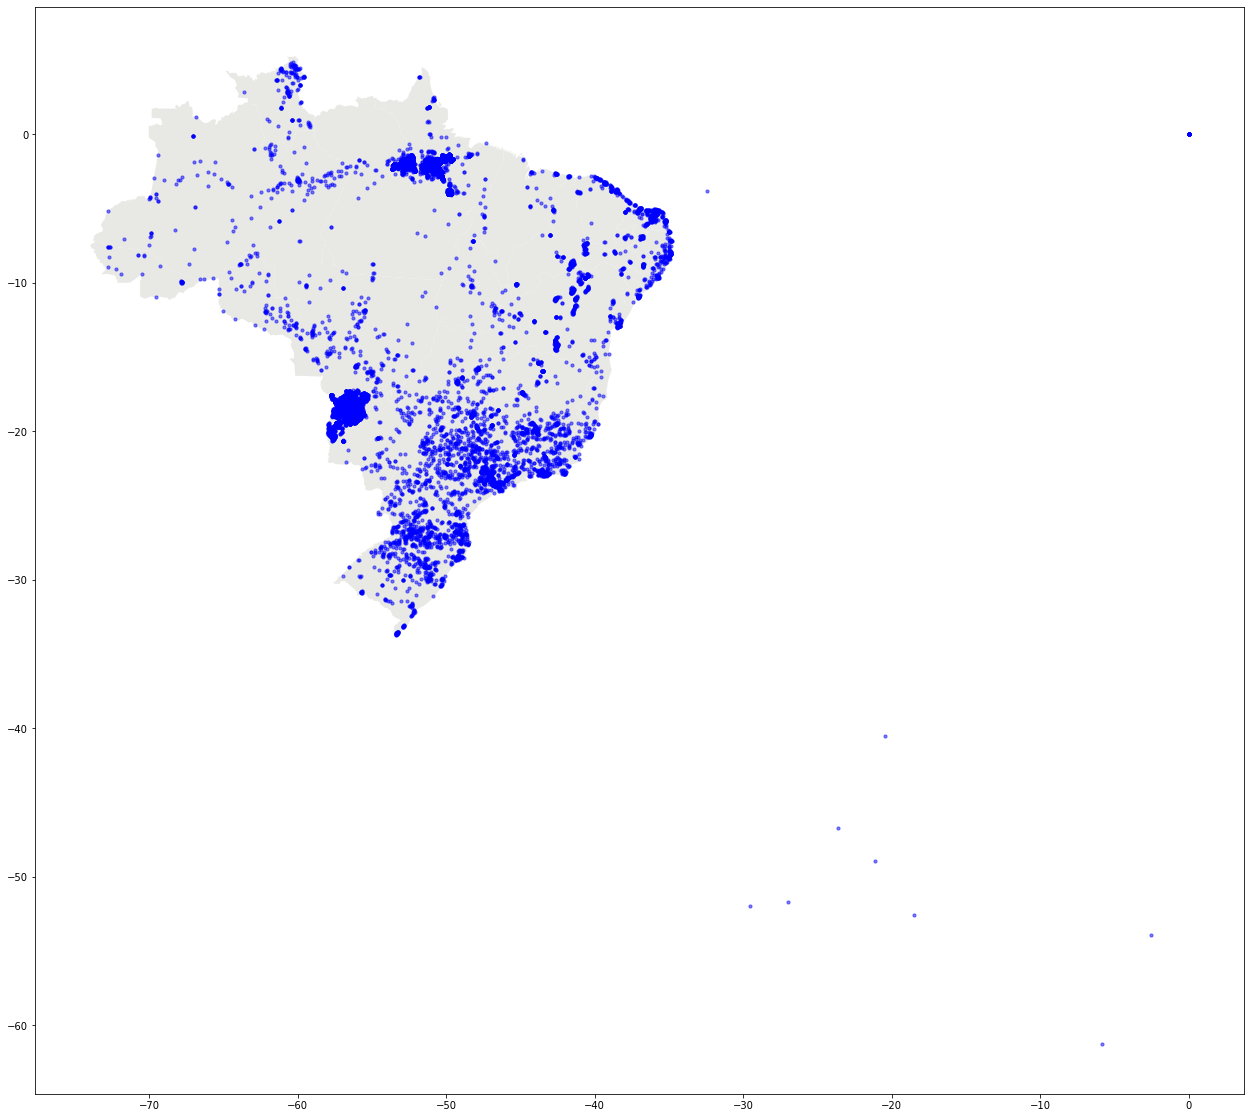

In [75]:
# VALIDAÇÃO DAS COORDENADAS DAS USINAS

geometria_usinas = [Point(coords) for coords in zip(df_usinas['NumCoordEEmpreendimento'], df_usinas['NumCoordNEmpreendimento'])]
geo_df_usinas = gpd.GeoDataFrame(df_usinas, geometry = geometria_usinas)

figura, eixo = plt.subplots()
figura.set_figheight(20)
figura.set_figwidth(40)
brasil_map.plot(ax = eixo, color="#e8e8e5")
geo_df_usinas.plot(ax = eixo, markersize = 10, color = "blue", alpha = 0.5)


In [76]:
# Problema A: Algumas coordenadas das usinas estão incorretas
'''
Pontos extremos do Brasil continental (IBGE, 2012):
    Norte    +05o 16'19"    -60o 12'45"    Nascente do Rio Ailã (Roraima)
    Sul      -33o 45'07"    -53o 23'50"    Arroio Chuí (Rio Grande do Sul)
    Leste    -07o 09'18"    -34o 47'34"    Ponta do Seixas (Cabo Branco-Paraíba)
    Oeste    -07o 32'09"    -73o 59'26"    Nascente do Rio Moa (Acre)
'''

print("Latitudes:\n",df_usinas['NumCoordEEmpreendimento'].describe(),"\n") # longitudes do conjunto de dados:
print("Longitudes:\n",df_usinas['NumCoordNEmpreendimento'].describe()) # latitudes do conjunto de dados:

Latitudes:
 count    21923.000000
mean       -50.595327
std          5.143893
min        -72.811111
25%        -52.644655
50%        -50.816538
75%        -49.796018
max          0.000000
Name: NumCoordEEmpreendimento, dtype: float64 

Longitudes:
 count    21923.000000
mean        -8.356198
std          8.813456
min        -61.298056
25%        -18.150515
50%         -2.447640
75%         -1.899270
max          4.889391
Name: NumCoordNEmpreendimento, dtype: float64


<AxesSubplot:>

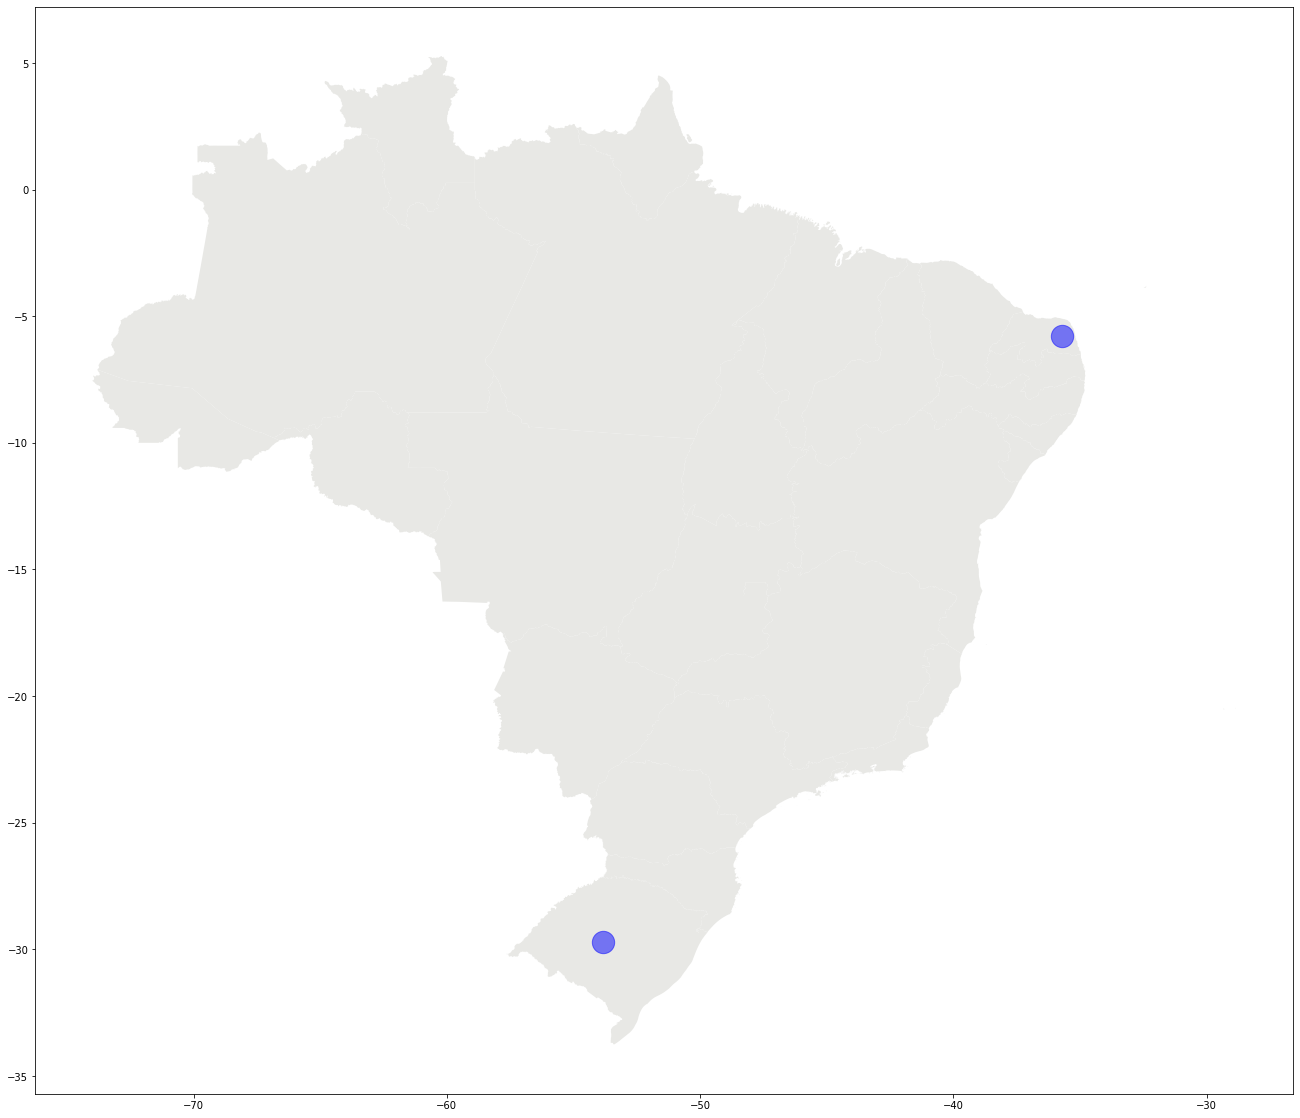

In [77]:
# Problema B: Algumas coordenadas estão incorretas e correspondem às coordenadas de cidades homônimas
# Exemplo: uma das entradas referentes à Santa Maria, no Rio Grande do Norte
# possui as coordenadas relativas à Santa Maria, no Rio Grande do Sul

filtro_santa_maria_rn = df_usinas[df_usinas["DscMuninicpios"]=="SANTA MARIA - RN"]
geometria_usinas = [Point(coords) for coords in zip(filtro_santa_maria_rn['NumCoordEEmpreendimento'], filtro_santa_maria_rn['NumCoordNEmpreendimento'])]
geo_df_santa_maria = gpd.GeoDataFrame(filtro_santa_maria_rn, geometry = geometria_usinas)

figura, eixo = plt.subplots()
figura.set_figheight(20)
figura.set_figwidth(40)
brasil_map.plot(ax = eixo, color="#e8e8e5")
geo_df_santa_maria.plot(ax = eixo, markersize = 500, color = "blue", alpha = 0.5)

In [78]:
# Problema A: Correção de valores de coordenadas
# --> exame dos dados das usinas com coordenadas a leste do meridiano -34 (Ponta dos Seixas)
# --> exame dos dados das usinas com coordenadas a sul do paralelo -34 (Arroio do Chuí)
filtro_coordenadas = df_usinas[(df_usinas["NumCoordEEmpreendimento"]>-34) | (df_usinas["NumCoordNEmpreendimento"]<-34)]
filtro_coordenadas.describe()

,IdeNucleoCEG,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,NumCoordNEmpreendimento,NumCoordEEmpreendimento
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,67031.688889,3282.182222,3282.133333,600.000000,-9.145369,-4.021987
std,15349.996057,11955.740209,11955.749751,4024.922359,19.817240,9.206682
min,58.000000,2.600000,2.000000,0.000000,-61.298056,-32.417201
25%,71827.000000,150.000000,150.000000,0.000000,0.000000,0.000000
50%,72845.000000,700.000000,700.000000,0.000000,0.000000,0.000000
75%,72972.000000,2330.000000,2330.000000,0.000000,0.000000,0.000000
max,73233.000000,80000.000000,80000.000000,27000.000000,0.000000,0.000000


In [79]:
filtro_coordenadas

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
14,01/09/2023,Alta Floresta,58,CGH.PH.RO.000058-2.2,RO,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,5000,0,Não,0.000000,0.000000,NaN,NaN,100% para ELETRON ELETRICIDADE DE RONDÔNIA S/A...,15 - Madeira,ALTA FLORESTA D'OESTE - RO
483,01/09/2023,Tubarão,2887,UTE.PE.PE.002887-8.1,PE,UTE,Operação,Fóssil,Petróleo,Concessão,...,4759,0,Não,-3.845176,-32.417201,23/03/2000,30/03/2030,100% para COMPANHIA ENERGÉTICA DE PERNAMBUCO (SP),NaN,FERNANDO DE NORONHA - PE
12840,01/09/2023,Valorgas Catanduva,54854,UTE.RU.SP.054854-5.1,SP,UTE,Operação,Biomassa,Resíduos sólidos urbanos,Registro,...,2852,0,Não,-48.933611,-21.126500,NaN,NaN,100% para Valorgas Energia Catanduva SPE LTDA ...,NaN,CATANDUVA - SP
12952,01/09/2023,Manicoré II,55254,UTE.PE.AM.055254-2.1,AM,UTE,Operação,Fóssil,Petróleo,Autorização,...,14692,0,Não,-61.298056,-5.813333,26/04/2023,26/10/2026,100% para Amazonas Energia S.A. (PIE),NaN,MANICORÉ - AM
13019,01/09/2023,Porto das Águas II,55534,UTE.AI.GO.055534-7.1,GO,UTE,Operação,Biomassa,Agroindustriais,Autorização,...,80000,27000,Não,-52.609056,-18.466972,25/11/2021,09/01/2044,100% para CERRADINHO BIOENERGIA S.A. (PIE),NaN,CHAPADÃO DO CÉU - GO
15623,01/09/2023,Condomínio 17.007 Nações,59671,UTE.PE.SP.059671-0.1,SP,UTE,Operação,Fóssil,Petróleo,Autorização,...,6000,0,Não,-46.721278,-23.638333,21/03/2022,21/03/2057,100% para CONDOMÍNIO 17.007 NAÇÕES (APE),NaN,SÃO PAULO - SP
16329,01/09/2023,Castanhal I,60667,UTE.FL.PA.060667-7.1,PA,UTE,Operação,Biomassa,Floresta,Registro,...,1200,0,Não,-53.956944,-2.535000,NaN,NaN,100% para Pena Florestal e Madeireira LTDA (REG),NaN,PRAINHA - PA
17153,01/09/2023,Folhito,61651,UTE.RU.RS.061651-6.1,RS,UTE,Operação,Biomassa,Resíduos sólidos urbanos,Registro,...,1000,0,Não,-51.949194,-29.554750,NaN,NaN,100% para Folhito LTDA (REG),NaN,ESTRELA - RS
17559,01/09/2023,Zucoloto Suimartin,62063,UTE.RA.ES.062063-7.1,ES,UTE,Operação,Biomassa,Resíduos animais,Registro,...,150,0,Não,-40.497722,-20.428417,NaN,NaN,100% para Suimartin Industria e Comercio LTDA....,NaN,VIANA - ES
17563,01/09/2023,R9 Energia,62073,UTE.FL.SC.062073-4.1,SC,UTE,Operação,Biomassa,Floresta,Registro,...,2500,0,Não,-51.730556,-27.008889,NaN,NaN,100% para R9 Energia LTDA. (REG),NaN,VARGEM BONITA - SC


In [80]:
# Os dados da usina localizada em Fernando de Noronha estão corretos e não requerem ajustes
filtro_coordenadas=filtro_coordenadas.drop(483)

In [81]:
# Há muitas coordenadas com valores nulos (zero)
indices_coordenadas_nulas = filtro_coordenadas[(filtro_coordenadas["NumCoordEEmpreendimento"]==0) | (filtro_coordenadas["NumCoordNEmpreendimento"]==0)].index
print(list(indices_coordenadas_nulas),"\n")

# As demais coordenadas não nulas estão trocadas (latitude pela longitude)
indices_coordenadas_trocadas = filtro_coordenadas[(filtro_coordenadas["NumCoordEEmpreendimento"]!=0) & (filtro_coordenadas["NumCoordNEmpreendimento"]!=0)].index
print(list(indices_coordenadas_trocadas))

[14, 19297, 25507, 25508, 25658, 25662, 25673, 25683, 25684, 25685, 25686, 25687, 25688, 25689, 25690, 25702, 25712, 25713, 25714, 25715, 25716, 25717, 25718, 25719, 25720, 25721, 25722, 25723, 25724, 25725, 25726, 25727, 25728, 25729, 25740, 25741] 

[12840, 12952, 13019, 15623, 16329, 17153, 17559, 17563]


In [82]:
# Trocando as coordenadas incorretas de lugar (latidude por longitude)
for indice in indices_coordenadas_trocadas:
    latitude = df_usinas.at[indice, "NumCoordEEmpreendimento"]
    longitude = df_usinas.at[indice, "NumCoordNEmpreendimento"]
    
    df_usinas.at[indice, "NumCoordEEmpreendimento"] = longitude
    df_usinas.at[indice, "NumCoordNEmpreendimento"] = latitude
    

df_usinas.loc[indices_coordenadas_trocadas]

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
12840,01/09/2023,Valorgas Catanduva,54854,UTE.RU.SP.054854-5.1,SP,UTE,Operação,Biomassa,Resíduos sólidos urbanos,Registro,...,2852,0,Não,-21.126500,-48.933611,NaN,NaN,100% para Valorgas Energia Catanduva SPE LTDA ...,NaN,CATANDUVA - SP
12952,01/09/2023,Manicoré II,55254,UTE.PE.AM.055254-2.1,AM,UTE,Operação,Fóssil,Petróleo,Autorização,...,14692,0,Não,-5.813333,-61.298056,26/04/2023,26/10/2026,100% para Amazonas Energia S.A. (PIE),NaN,MANICORÉ - AM
13019,01/09/2023,Porto das Águas II,55534,UTE.AI.GO.055534-7.1,GO,UTE,Operação,Biomassa,Agroindustriais,Autorização,...,80000,27000,Não,-18.466972,-52.609056,25/11/2021,09/01/2044,100% para CERRADINHO BIOENERGIA S.A. (PIE),NaN,CHAPADÃO DO CÉU - GO
15623,01/09/2023,Condomínio 17.007 Nações,59671,UTE.PE.SP.059671-0.1,SP,UTE,Operação,Fóssil,Petróleo,Autorização,...,6000,0,Não,-23.638333,-46.721278,21/03/2022,21/03/2057,100% para CONDOMÍNIO 17.007 NAÇÕES (APE),NaN,SÃO PAULO - SP
16329,01/09/2023,Castanhal I,60667,UTE.FL.PA.060667-7.1,PA,UTE,Operação,Biomassa,Floresta,Registro,...,1200,0,Não,-2.535000,-53.956944,NaN,NaN,100% para Pena Florestal e Madeireira LTDA (REG),NaN,PRAINHA - PA
17153,01/09/2023,Folhito,61651,UTE.RU.RS.061651-6.1,RS,UTE,Operação,Biomassa,Resíduos sólidos urbanos,Registro,...,1000,0,Não,-29.554750,-51.949194,NaN,NaN,100% para Folhito LTDA (REG),NaN,ESTRELA - RS
17559,01/09/2023,Zucoloto Suimartin,62063,UTE.RA.ES.062063-7.1,ES,UTE,Operação,Biomassa,Resíduos animais,Registro,...,150,0,Não,-20.428417,-40.497722,NaN,NaN,100% para Suimartin Industria e Comercio LTDA....,NaN,VIANA - ES
17563,01/09/2023,R9 Energia,62073,UTE.FL.SC.062073-4.1,SC,UTE,Operação,Biomassa,Floresta,Registro,...,2500,0,Não,-27.008889,-51.730556,NaN,NaN,100% para R9 Energia LTDA. (REG),NaN,VARGEM BONITA - SC


In [83]:
# Atribuição de coordenadas às entradas com coordenadas nulas
# ---> Atribuição das coordenadas do município em que a usina está instalada
#      (Localização aproximada; passível de erro para grandes cidades (e.g., São Paulo, São Luís))
# ---> Fonte dos dados das coordenadas dos municípios: 
#      IBGE (https://www.ibge.gov.br/geociencias/organizacao-do-territorio/estrutura-territorial/27385-localidades.html)
# ---> Fonte dos dados das coordenadas das usinas de geração de energia elétrica:
#      ANEEL (https://dadosabertos.aneel.gov.br/dataset/siga-sistema-de-informacoes-de-geracao-da-aneel)


# Lista contendo os municípios que possuem usinas instaladas e suas coordenadas (i.e., do município)
df_municipios_com_usinas.head(10)

,MUNICÍPIO - UF,UF,LATITUDE,LONGITUDE
0,ABADIA DOS DOURADOS - MG,MG,-18.487565,-47.396832
1,ABAIARA - CE,CE,-7.356977,-39.047547
2,ABDON BATISTA - SC,SC,-27.608987,-51.025272
3,ABELARDO LUZ - SC,SC,-26.563031,-52.336482
4,ABRE CAMPO - MG,MG,-20.301445,-42.480990
5,ABREU E LIMA - PE,PE,-7.904449,-34.899131
6,ACARAÚ - CE,CE,-2.885311,-40.118241
7,ACARÁ - PA,PA,-1.963437,-48.200456
8,ACAUÃ - PI,PI,-8.220787,-41.083638
9,ACREÚNA - GO,GO,-17.398156,-50.374973


In [55]:
print(list(indices_coordenadas_nulas))

[14, 19297, 25507, 25508, 25658, 25662, 25673, 25683, 25684, 25685, 25686, 25687, 25688, 25689, 25690, 25702, 25712, 25713, 25714, 25715, 25716, 25717, 25718, 25719, 25720, 25721, 25722, 25723, 25724, 25725, 25726, 25727, 25728, 25729, 25740, 25741]


In [84]:
# Atribuição de coordenadas do município às usinas com coordenadas nulas
for indice in indices_coordenadas_nulas:
    municipio_estado = df_usinas.at[indice, "DscMuninicpios"]
    linha_municipio = df_municipios_com_usinas[df_municipios_com_usinas["MUNICÍPIO - UF"] == municipio_estado]
    if len(linha_municipio) != 0:
        latitude = linha_municipio["LATITUDE"].iloc[0]
        longitude = linha_municipio["LONGITUDE"].iloc[0]

        df_usinas.at[indice, "NumCoordEEmpreendimento"] = longitude
        df_usinas.at[indice, "NumCoordNEmpreendimento"] = latitude


df_usinas.loc[indices_coordenadas_nulas]

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
14,01/09/2023,Alta Floresta,58,CGH.PH.RO.000058-2.2,RO,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,5000,0,Não,-11.935540,-61.999824,NaN,NaN,100% para ELETRON ELETRICIDADE DE RONDÔNIA S/A...,15 - Madeira,ALTA FLORESTA D'OESTE - RO
19297,01/09/2023,Delir Rosset,63851,UFV.RS.PR.063851-0.1,PR,UFV,Operação,Solar,Radiação solar,Registro,...,100,0,Não,-24.953798,-53.459722,NaN,NaN,100% para Delir Rosset (REG),NaN,CASCAVEL - PR
25507,01/09/2023,UTX Amajari,71827,UFV.RS.RR.071827-0.1,RR,UFV,Operação,Solar,Radiação solar,Autorização,...,1050,0,Não,3.652118,-61.420590,13/09/2021,13/09/2056,100% para Usina Xavantes S.A. (PIE),NaN,AMAJARI - RR
25508,01/09/2023,UTX Pacaraima,71828,UFV.RS.RR.071828-9.1,RR,UFV,Operação,Solar,Radiação solar,Autorização,...,1050,0,Não,4.475259,-61.147306,13/09/2021,13/09/2056,100% para Usina Xavantes S.A. (PIE),NaN,PACARAIMA - RR
25658,01/09/2023,Sbravati,72656,CGH.PH.SC.072656-7.1,SC,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,1215,0,Não,-27.282983,-50.582601,NaN,NaN,100% para INDUSTRIA DE CARTÃO SBRAVATI LTDA (REG),NaN,CURITIBANOS - SC
25662,01/09/2023,Tate & Lyle,72717,UTE.FL.SP.072717-2.1,SP,UTE,Operação,Biomassa,Floresta,Registro,...,3160,0,Não,-21.485273,-47.367269,NaN,NaN,100% para PRIMARY PRODUCTS INGREDIENTS BRASIL ...,NaN,SANTA ROSA DE VITERBO - SP
25673,01/09/2023,Emgetis,72813,UTE.PE.SE.072813-6.1,SE,UTE,Operação,Fóssil,Petróleo,Registro,...,272,0,Não,-10.907216,-37.048213,NaN,NaN,100% para EMPRESA SERGIPANA DE TECNOLOGIA DA I...,NaN,ARACAJU - SE
25683,01/09/2023,Alphaville Fortaleza Clube,72838,UFV.RS.CE.072838-1.1,CE,UFV,Operação,Solar,Radiação solar,Registro,...,20,0,Não,-3.886973,-38.445122,NaN,NaN,100% para ALPHAVILLE FORTALEZA CLUBE (REG),NaN,EUSÉBIO - CE
25684,01/09/2023,Ape Açai Amazonas,72839,UFV.RS.PA.072839-0.1,PA,UFV,Operação,Solar,Radiação solar,Registro,...,540,0,Não,-1.909235,-55.516324,NaN,NaN,100% para AÇAÍ AMAZONAS INDÚSTRIA E COMÉRCIO L...,NaN,ÓBIDOS - PA
25685,01/09/2023,Ape Rafitec Esplanada,72840,UFV.RS.BA.072840-3.1,BA,UFV,Operação,Solar,Radiação solar,Registro,...,110,0,Não,-11.799409,-37.944981,NaN,NaN,100% para RAFITEC S/A INDÚSTRIA E COMÉRCIO DE ...,NaN,ESPLANADA - BA


<AxesSubplot:>

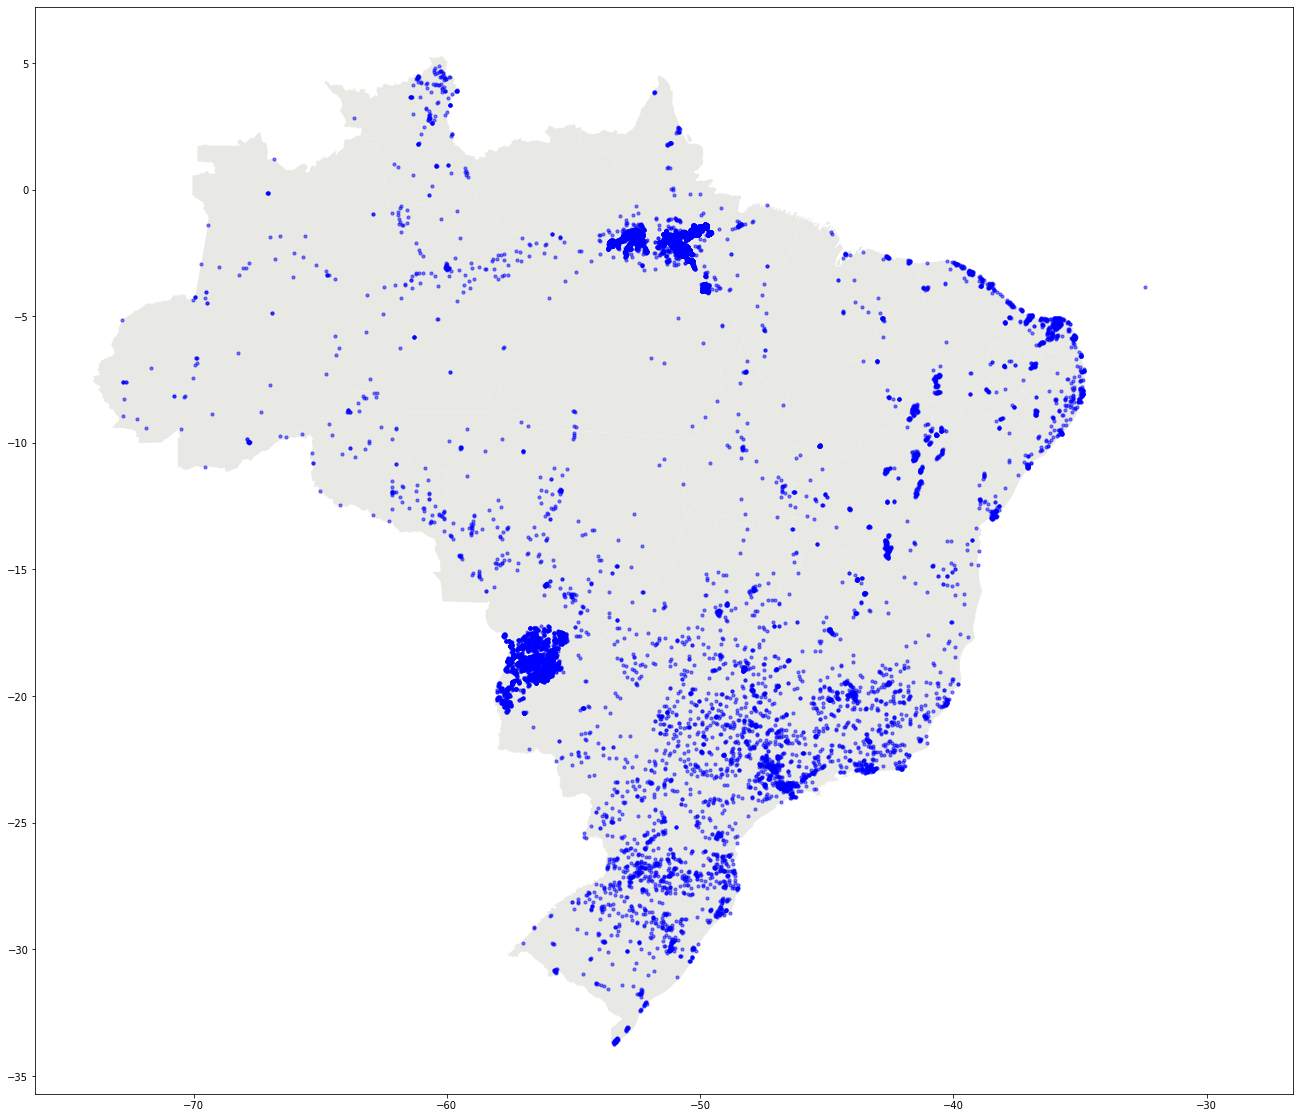

In [85]:
# As coordenadas das usinas agora estão dentro das margens esperadas

geometria_usinas = [Point(coords) for coords in zip(df_usinas['NumCoordEEmpreendimento'], df_usinas['NumCoordNEmpreendimento'])]
geo_df_usinas = gpd.GeoDataFrame(df_usinas, geometry = geometria_usinas)

figura, eixo = plt.subplots()
figura.set_figheight(20)
figura.set_figwidth(40)
brasil_map.plot(ax = eixo, color="#e8e8e5")
geo_df_usinas.plot(ax = eixo, markersize = 10, color = "blue", alpha = 0.5)

In [86]:
# Problema B: Corrigindo as coordenadas referentes a usinas com valores distoantes das coordenadas dos municípios

# Nota: Há municípios muito grandes (e.g., Altamira) que podem abrigar assentamentos localizados a grandes distâncias de suas prefeituras
# É possível que tais empreendimentos sejam afetados nesta etapa da limpeza de dados, apesar de não possuirem erros em suas coordenadas

distancia_max_por_UF = {
    "AC":800,
    "AL":200,
    "AP":700,
    "AM":1200,
    "BA":700,
    "CE":700,
    "DF":200,
    "ES":300,
    "GO":900,
    "MA":900,
    "MT":900,
    "MS":900,
    "MG":900,
    "PA":1200,
    "PB":700,
    "PR":700,
    "PE":700,
    "PI":700,
    "RJ":500,
    "RN":200,
    "RS":500,
    "RO":500,
    "RR":500,
    "SC":500,
    "SP":500,
    "SE":200,
    "TO":900
}

df_usinas_validacao = df_usinas.copy()

import haversine as hs

indices_discrepantes = []

# Há usinas localizadas em mais de um município. Utilizarei o primeiro município para fins de validação das coordenadas
for indice, linha in df_usinas_validacao.iterrows():
    municipios = linha["DscMuninicpios"].split(". ")
    municipio_estado = municipios[0] # selecionando apenas o primeiro município
    df_usinas_validacao.at[indice, "DscMuninicpios"] = municipio_estado # formato: Nome - Sigla da unidade federativa
    latitude_usina = df_usinas_validacao.at[indice, "NumCoordNEmpreendimento"]
    longitude_usina = df_usinas_validacao.at[indice, "NumCoordEEmpreendimento"]
    
    #busca pelo município da tabela de usinas na tabela de municípios
    linha_municipio = df_municipios_com_usinas[df_municipios_com_usinas["MUNICÍPIO - UF"] == municipio_estado]

    latitude_municipio = linha_municipio["LATITUDE"].iloc[0]
    longitude_municipio = linha_municipio["LONGITUDE"].iloc[0]
    UF = linha_municipio["UF"].iloc[0]
    limite = 800
    distancia = hs.haversine((latitude_municipio, longitude_municipio),
                             (latitude_usina, longitude_usina), 
                             unit = hs.Unit.KILOMETERS) # Referência: https://www.askpython.com/python/examples/find-distance-between-two-geo-locations
    if distancia > limite: # verificando se as coordenadas do município condizem com as coordenadas da usina
        potencia = df_usinas_validacao.at[indice, "MdaPotenciaFiscalizadaKw"]
        indices_discrepantes.append(indice)
        print(f"{municipio_estado}\t{indice}\t{distancia:.0f}\t{latitude_municipio:.2f}\t{longitude_municipio:.2f}\t{latitude_usina:.2f}\t{longitude_usina:.2f}\t{potencia}")
        # corrija as coordenadas da usina, aproximando-as às coordenadas do município de acordo com o conjunto de dados do IBGE
        #df_usinas_validacao.at[indice, "NumCoordNEmpreendimento"] = latitude_municipio
        #df_usinas_validacao.at[indice, "NumCoordEEmpreendimento"] = longitude_municipio
        
print(indices_discrepantes)
df_usinas_validacao.head()  
    


PORTO VELHO - RO	368	2882	-8.77	-63.83	-6.75	-37.74	48
BELÉM - PA	1945	1132	-1.46	-48.49	-9.34	-54.97	408
SANTO ANTÔNIO DOS LOPES - MA	2256	2429	-4.87	-44.36	-26.29	-48.88	337600
SANTO ANTÔNIO DOS LOPES - MA	2257	1710	-4.87	-44.36	-19.75	-40.38	337600
ARAÇATUBA - SP	2823	950	-21.21	-50.44	-13.46	-54.20	121
SANTA MARIA - RN	3258	3307	-5.65	-35.30	-29.70	-53.84	1000
TURVO - SC	4061	1070	-28.92	-49.68	-19.30	-49.65	1094
SÃO PAULO - SP	4759	944	-23.57	-46.57	-15.54	-43.63	5000
BOCA DO ACRE - AM	5662	1119	-8.75	-67.40	-3.11	-59.02	10614
CORUMBÁ - MS	25495	2025	-19.01	-57.65	-2.05	-50.85	1
CORUMBÁ - MS	25497	2047	-19.01	-57.65	-1.81	-50.93	1
[368, 1945, 2256, 2257, 2823, 3258, 4061, 4759, 5662, 25495, 25497]


,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
0,01/09/2023,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1400,0,Não,-20.124799,-43.870203,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
1,01/09/2023,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,3972,0,Não,-20.131873,-43.876935,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
2,01/09/2023,G,10,PCH.PH.MG.000010-8.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1440,0,Não,-20.137545,-43.891926,31/08/2000,31/08/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
3,01/09/2023,14 de Julho,12,UHE.PH.RS.000012-4.1,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,...,100000,45200,Não,-29.064753,-51.674942,15/03/2001,13/11/2039,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,BENTO GONÇALVES - RS
4,01/09/2023,Abaúna,15,CGH.PH.RS.000015-9.1,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,720,510,Não,-27.823775,-52.069997,NaN,NaN,100% para Cooperativa de Geração de Energia e ...,72 - Uruguai. Inhanduva. Peixe e outros,FLORIANO PEIXOTO - RS


In [87]:
print(len(df_usinas))
# AÇÃO: remover as usinas com coordenadas discrepantes da lista de usinas a serem consideradas neste estudo
df_usinas.drop(indices_discrepantes, inplace=True)
print(len(df_usinas))

21923
21912


<AxesSubplot:>

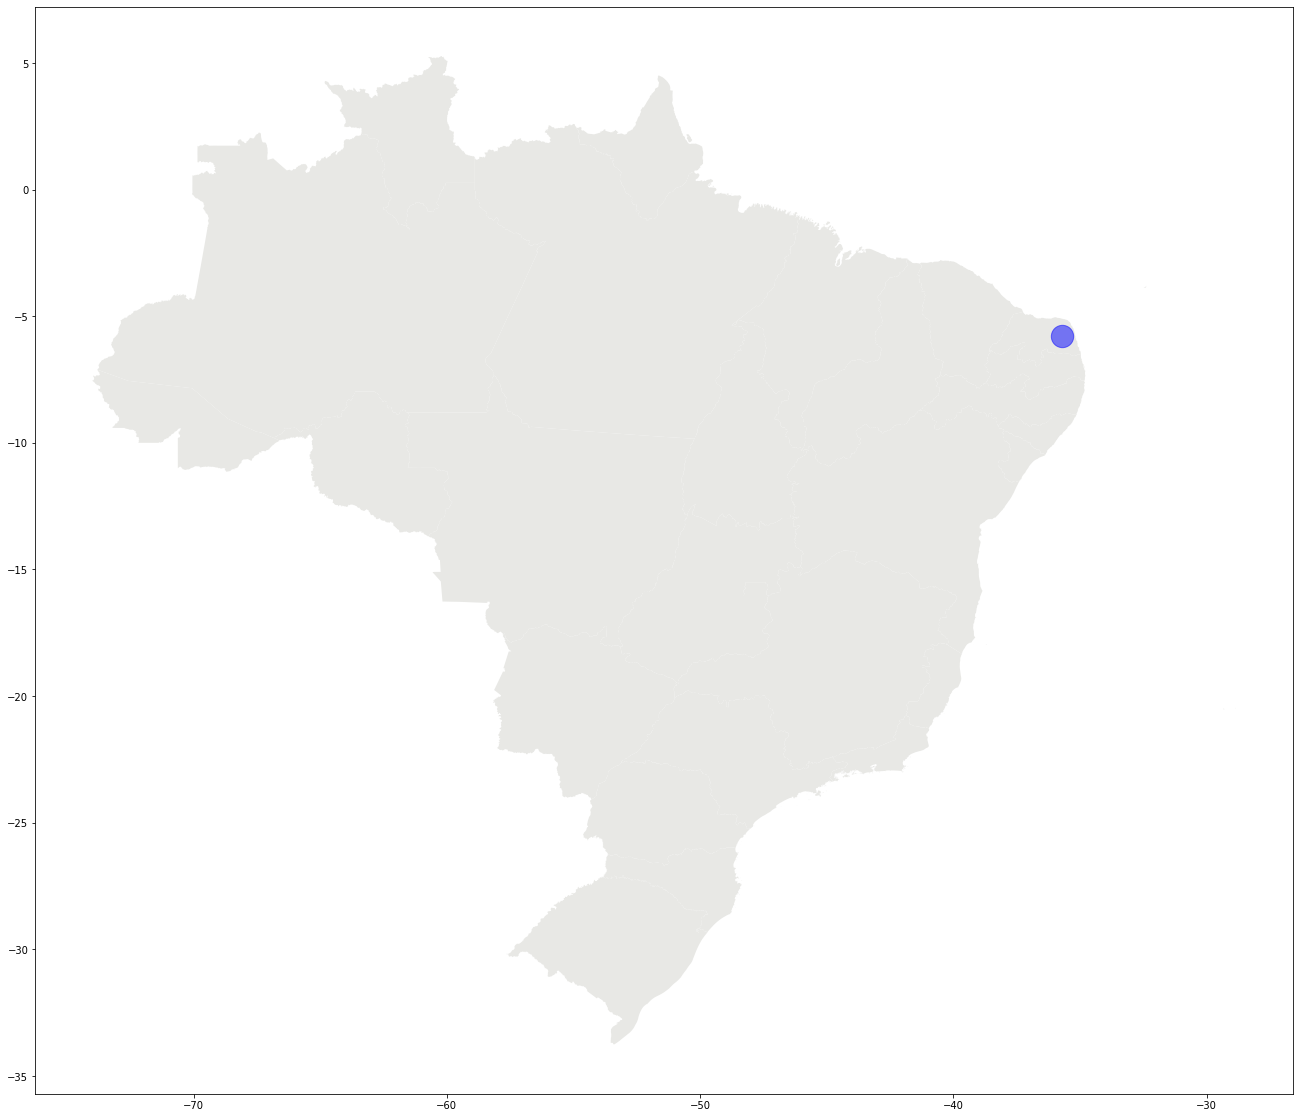

In [88]:
# Verificação da efetividade da correção das coordenadas da usina no município de Santa Maria - RN
filtro_santa_maria_rn = df_usinas[df_usinas["DscMuninicpios"]=="SANTA MARIA - RN"]
geometria_usinas = [Point(coords) for coords in zip(filtro_santa_maria_rn['NumCoordEEmpreendimento'], filtro_santa_maria_rn['NumCoordNEmpreendimento'])]
geo_df_santa_maria = gpd.GeoDataFrame(filtro_santa_maria_rn, geometry = geometria_usinas)

figura, eixo = plt.subplots()
figura.set_figheight(20)
figura.set_figwidth(40)
brasil_map.plot(ax = eixo, color="#e8e8e5")
geo_df_santa_maria.plot(ax = eixo, markersize = 500, color = "blue", alpha = 0.5)

#### Salvando o conjunto de dados referentes às usinas elétricas

In [92]:
df_usinas.to_csv(r"..\Dados tratados\LISTA - USINAS.csv", encoding = "utf-8", index = False)